In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve
from scipy import ndimage
from getBayer import getBayer, bayerGrid
% matplotlib inline
import io
import time
from numpy.lib.stride_tricks import as_strided

In [15]:
rgbIm = getBayer('wall2.pickle')
kernel = np.ones((3,3),dtype=np.uint8)
bayer_conv = np.zeros(bayerGrid.shape, dtype=np.uint8)
for i in range(3):
    bayer_conv[:,:,i] = convolve(bayerGrid[:,:,i], kernel, mode='same')
rgbConv = np.zeros(rgbIm.shape, dtype=np.uint16)  # max sum here should be 1275 for 5 maxed green sencels
for i in range(3):
    rgbConv[:,:,i] = convolve(rgbIm[:,:,i].astype(np.uint16), kernel, mode='same')
    
res = rgbConv / bayer_conv
res = res.astype(np.uint8)
import copy
testIm = copy.deepcopy(res)



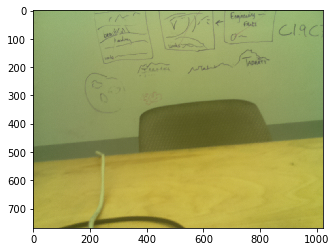

In [16]:
testIm = np.array(Image.open("wall1.jpeg"))
plt.imshow(testIm)

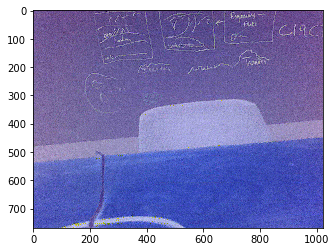

In [49]:
sharpen = np.array([[-1, -1, -1 ], [-1, 9, -1], [-1, -1, -1]])
sharpIm = np.zeros(testIm.shape, dtype=np.float32)
for i in range(3):
    sharpIm[:,:,i] = convolve(testIm[:,:,i].astype(np.float32), sharpen.astype(np.float32), mode='same')
sharpIm[sharpIm < 0] = 0
sharpIm[sharpIm > 255] = 255
plt.imshow(sharpIm)

In [50]:
bad = sharpIm*.9
type(bad)

numpy.ndarray

In [41]:
a = np.float32(.9)

In [42]:
a

0.89999998

In [43]:
a.astype(np.int16)

0

In [44]:
bad.astype(np.int16)

array([[[755, 864, 531],
        [476, 569, 342],
        [486, 595, 363],
        ..., 
        [484, 629, 394],
        [482, 614, 374],
        [728, 919, 584]],

       [[525, 603, 385],
        [133, 153,  98],
        [121, 158,  97],
        ..., 
        [143, 170, 103],
        [131, 163,  91],
        [473, 607, 369]],

       [[442, 557, 318],
        [119, 134,  75],
        [127, 138,  83],
        ..., 
        [126, 156,  95],
        [117, 151,  87],
        [497, 630, 380]],

       ..., 
       [[609, 586, 247],
        [162, 154,  56],
        [164, 157,  54],
        ..., 
        [169, 154,  76],
        [153, 162,  49],
        [609, 617, 186]],

       [[646, 629, 287],
        [135, 132,  45],
        [169, 166,  86],
        ..., 
        [153, 142,  59],
        [172, 161,  59],
        [617, 613, 178]],

       [[931, 912, 426],
        [623, 604, 285],
        [641, 622, 306],
        ..., 
        [642, 615, 238],
        [639, 617, 213],
        [949, 906,

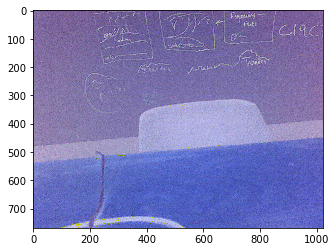

In [45]:
plt.imshow(bad.astype(np.int16))

In [24]:
type(sharpIm)

numpy.ndarray

In [25]:
np.max(sharpIm)

844.00000000000375

In [22]:
0b111111111

511

In [31]:
np.max(testIm.astype(np.uint64))

101